# Task 2

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# img1 = cv2.imread('t2_1.png')
# img2 = cv2.imread('t2_2.png')
# img3 = cv2.imread('t2_3.png')
# img4 = cv2.imread('t2_4.png')

img1 = cv2.imread('t3_1.png')
img2 = cv2.imread('t3_2.png')
img3 = cv2.imread('t3_3.png')
img4 = cv2.imread('t3_4.png')
img5 = cv2.imread('t3_5.png')

In [83]:
def Crop(img):
    Y, X, _ = np.nonzero(img)
    minrow = np.min(X)
    mincol = np.min(Y)
    maxrow = np.max(X)
    maxcol = np.max(Y)
    img = img[mincol:maxcol, minrow:maxrow]
    return img

In [84]:
def SIFTFeatureDetection(img):
    sift = cv2.xfeatures2d.SIFT_create()
    kps, features = sift.detectAndCompute(img, None)
    features = features / np.linalg.norm(features)
    kps = cv2.KeyPoint_convert(kps)
    return kps, features

In [85]:
kps1, features1 = SIFTFeatureDetection(img1)
kps2, features2 = SIFTFeatureDetection(img2)

In [86]:
def CrossCorrelationMatching(features1, features2, T):
    X = [] 
    Y = []
    M = len(features1)
    N = len(features2)
    D = np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            D[i][j] = np.correlate(features1[i], features2[j])
    D = 1 - (D/D.max())
    
    for i in range(0,len(D)):
        if D[i].min() < T: # Tune
            X.append(i)
            Y.append(D[i].argmin())
            
    return X, Y

In [87]:
X, Y = CrossCorrelationMatching(features1, features2, T = 0.01)

In [88]:
match_list1 = kps1[X]
match_list2 = kps2[Y]

In [89]:
M, _ = cv2.findHomography(np.array(match_list1), np.array(match_list2), cv2.RANSAC, 5.0)

In [90]:
M

array([[ 9.99864802e-01,  2.10236316e-05, -5.79941807e+02],
       [-1.46492811e-04,  9.99912689e-01, -3.89977652e+00],
       [-1.37090786e-07,  5.84112625e-09,  1.00000000e+00]])

In [91]:
def WarpStitching(img1, img2, M):
    width1, height1 = img1.shape[:2]
    width2, height2 = img2.shape[:2]

    X = np.float32([[0, 0], [0, width1], [height1, width1], [height1, 0]]).reshape(-1,1,2)
    Y = np.float32([[0, 0], [0, width2], [height2, width2], [height2, 0]]).reshape(-1,1,2)
    Y = cv2.perspectiveTransform(Y, M)
    
    Z = np.concatenate((X, Y), axis = 0)
    minZ = Z.min(axis = 0).flatten()
    maxZ = Z.max(axis = 0).flatten()
    [minrow, mincol] = np.int32(minZ - 0.5)
    [maxrow, maxcol] = np.int32(maxZ + 0.5)
    
    H = np.array([[1, 0 , -minrow], [0, 1, -mincol], [0, 0, 1]])
    
    warped = cv2.warpPerspective(img2, H.dot(M),(maxrow - minrow, maxcol - mincol))
    warped[-mincol:width1-mincol, -minrow:height1-minrow] = img1
    stitched = warped
    
    return stitched

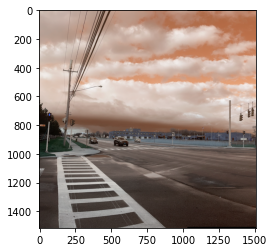

In [92]:
final = WarpStitching(img2, img1, M)
plt.imshow(final)

In [95]:
import glob
import cv2
# filenames = glob.glob("t2_*.png")
filenames = glob.glob("t3_*.png")
filenames.sort()
images = [cv2.imread(img) for img in filenames]

In [96]:
final = images[0]
for i in range(1, len(images)):
    kps1, features1 = SIFTFeatureDetection(final)
    kps2, features2 = SIFTFeatureDetection(images[i])
    X, Y = CrossCorrelationMatching(features1, features2, T = 0.01)
    match_list1 = kps1[X]
    match_list2 = kps2[Y]
    M, _ = cv2.findHomography(np.array(match_list1), np.array(match_list2), cv2.RANSAC, 5.0)
    final = WarpStitching(images[i], final, M)
    final = Crop(final)

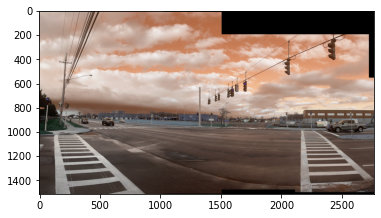

In [97]:
plt.imshow(Crop(final))

In [98]:
M = len(images)
overlap_arr = np.zeros((M, M))
for i in range(M):
    for j in range(M):
        kps1, features1 = SIFTFeatureDetection(images[i])
        kps2, features2 = SIFTFeatureDetection(images[j])
        X, Y = CrossCorrelationMatching(features1, features2, T = 0.01)
        if len(X) > 50:
            overlap_arr[i][j] = 1

In [99]:
overlap_arr

array([[1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.]])

# Task 1

In [155]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [156]:
img1 = cv2.imread('t1_1.png')
img2 = cv2.imread('t1_2.png')

In [157]:
def SIFTFeatureDetection(img):
    sift = cv2.xfeatures2d.SIFT_create()
    kps, features = sift.detectAndCompute(img, None)
    # features = features / np.linalg.norm(features)
    kps = cv2.KeyPoint_convert(kps)
    return kps, features

In [158]:
def CrossCorrelationMatching1(features1, features2, T):
    X = [] 
    Y = []
    M = len(features1)
    N = len(features2)
    D = np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            D[i][j] = np.correlate(features1[i], features2[j])
    D = 1 - (D/D.max())
    
    for i in range(0,len(D)):
        if D[i].min() < T: # Tune
            X.append(i)
            Y.append(D[i].argmin())
            
    return X, Y

In [159]:
def CrossCorrelationMatching(features1, features2, T):

    X = []
    Y = []
    M = len(features1)
    N = len(features2)
    distance = np.zeros((1, M))
    min_distance = np.zeros((1, N))

    n_matches = 0

    for i in range(1, N):
        for j in range(1, M):
            diff = features2[i][:] - features1[j][:]
            distance[0][j] = np.linalg.norm(diff)
        min_index = np.argsort(distance[0])
        distance[0] = np.sort(distance[0])
        min_distance[0][i] = distance[0][1]
        if distance[0][1] < T * distance[0][2]:
            n_matches = n_matches + 1
            X.append(i)
            Y.append(min_index[1])
    
    return X, Y

In [160]:
def CrossCorrelationMatching2(features1, features2, T):    
    X = []
    Y = []
    M = len(features1)
    N = len(features2)
    for i in range(N):
        matches = []
        for j in range(M):
            difference = features2[i]-features1[j]
            product = np.dot(difference, difference)
            matches.append(product)
        minimum = np.min(matches)
        if(minimum < T):
            X.append(i)
            Y.append(matches.index(minimum))

    return X, Y

In [161]:
def WarpStitching(img1, img2, M):   
    
    width1, height1 = img1.shape[:2]
    width2, height2 = img2.shape[:2]

    X = np.float32([[0, 0], [0, width1], [height1, width1], [height1, 0]]).reshape(-1,1,2)
    Y = np.float32([[0, 0], [0, width2], [height2, width2], [height2, 0]]).reshape(-1,1,2)
    Y = cv2.perspectiveTransform(Y, M)
    
    Z = np.concatenate((X, Y), axis = 0)
    minZ = Z.min(axis = 0).flatten()
    maxZ = Z.max(axis = 0).flatten()
    [minrow, mincol] = np.int32(minZ - 0.5)
    [maxrow, maxcol] = np.int32(maxZ + 0.5)
    
    warped = cv2.warpPerspective(img2, M,(maxrow - minrow, maxcol - mincol), dst = img1.copy(), flags = cv2.INTER_NEAREST, borderMode = cv2.BORDER_TRANSPARENT)
    
    return warped

In [162]:
def Replace(img, final):
    M = img.shape[0]
    N = img.shape[1]
    for i in range(0, M-1):
        for j in range(0, N-1):
            final_pixel = np.sum(final[i][j])
            img_pixel = np.sum(img1[i][j])
            if final_pixel < img_pixel:
                final[i][j] = img1[i][j]           
                
    return final

In [163]:
kps1, features1 = SIFTFeatureDetection(img1)
kps2, features2 = SIFTFeatureDetection(img2)

In [164]:
X, Y = CrossCorrelationMatching(features1, features2, T = 0.5)

In [165]:
match_list1 = kps2[X]
match_list2 = kps1[Y]

In [166]:
H, _ = cv2.findHomography(np.array(match_list1), np.array(match_list2), cv2.RANSAC, 5.0)

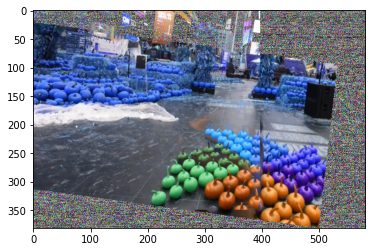

In [167]:
final = WarpStitching(img1, img2, H)
final = Replace(img1, final)
plt.imshow(final)

In [865]:
sift = cv2.xfeatures2d.SIFT_create()
(kps1, features1) = sift.detectAndCompute(img1, None)
(kps2, features2) = sift.detectAndCompute(img2, None)

matches = []
for p2 in range(len(features2)):
    lst = []
    for p1 in range(len(features1)):
        lst.append(np.dot(features2[p2]-features1[p1],features2[p2]-features1[p1]))
    if(min(lst)<5000):
        matches.append([p2,lst.index(min(lst))])

src_pts = np.array([kps2[match[0]].pt for match in matches])
dst_pts = np.array([kps1[match[1]].pt for match in matches])       
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    
width = img1.shape[1] + img2.shape[1]
height = img1.shape[0] + img2.shape[0]

result = cv2.warpPerspective(img2,H, (width,height), dst=img1.copy(), flags=cv2.INTER_NEAREST, borderMode=cv2.BORDER_TRANSPARENT) 
for i in range(0,img1.shape[0]-1):
    for j in range(0,img1.shape[1]-1):
        if np.sum(result[i][j]) > np.sum(img1[i][j]):
              result[i][j]=result[i][j]
        else:
              result[i][j]=img1[i][j]

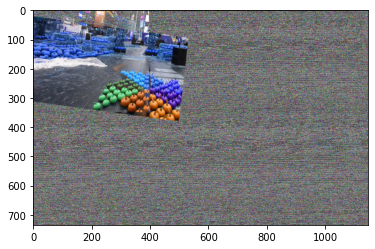

In [866]:
plt.imshow(result)